# Heart Attack Analysis & Prediction Dataset

In this project, we have to predict whether a patient has a low chance of a heart attack or a high chance, according to the medical information of a patient.The data is saved in `heart.csv` file.

## Import Python Modules

First we import the modules that will be used in this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('heart.csv')

df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [39]:
print(df.isnull().sum())
print()
print(f"Number of duplicate rows: {df.duplicated().sum()}")

df[df.duplicated()]

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Number of duplicate rows: 1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [4]:
df.drop_duplicates(inplace = True)

Our dataset is very clean. We have only one duplicated row and zero null value in the columns.

In [5]:
df.shape

(302, 14)

This dataset has 302 rows and 14 columns(features).

The dataset provided has the following columns of multiple-choice data:

- age : Age of the patient

- sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type:
  * Value 1: typical angina
  * Value 2: atypical angina
  * Value 3: non-anginal pain
  * Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results

  * Value 0: normal
  * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
  * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved

- thall : Thalium Stress Test result ~ (0,3)

- oldpeak : Previous peak

- slp : Slope

- target : 0= less chance of heart attack 1= more chance of heart attack

Now lets separating categorical columns from continous numerical columns and find the statistical details of continous columns.

In [6]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
continous_columns = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

df[continous_columns].describe()

,age,trtbps,chol,thalachh,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


## Explore and Explain Data

### Continous Variables

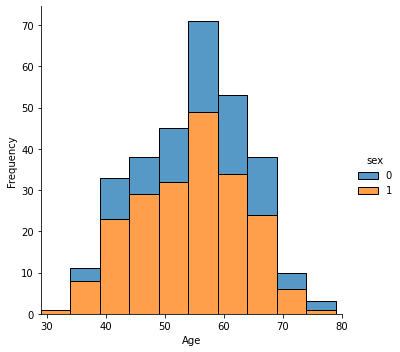

In [13]:
sns.displot(data=df, x="age", hue="sex", binwidth = 5, multiple = "stack");

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(29, 80)
plt.show()

Most of the patients of this dataset are males and age of them are between 30 and 80.

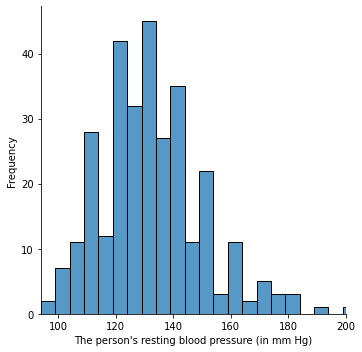

In [27]:
sns.displot(data=df, x="trtbps", binwidth = 5);

plt.xlabel("The person's resting blood pressure (in mm Hg)")
plt.ylabel("Frequency")
plt.xlim(94, 200)
plt.show()

We can see that most of the patients have a blood pressure around 130 mm Hg.

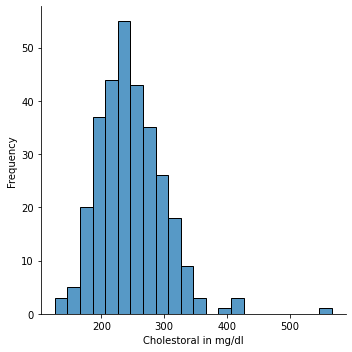

In [26]:
sns.displot(data=df, x="chol", binwidth = 20);

plt.xlabel("Cholestoral in mg/dl")
plt.ylabel("Frequency")
plt.show()

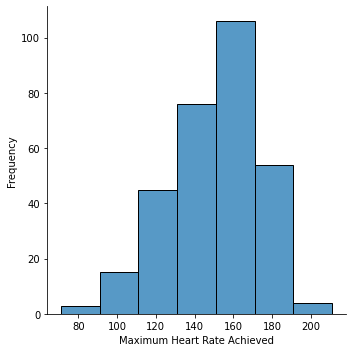

In [25]:
sns.displot(data=df, x="thalachh", binwidth = 20);

plt.xlabel("Maximum Heart Rate Achieved")
plt.ylabel("Frequency")
plt.show()

Maximum Heart Rate Achieved by most of the patients is around 160.

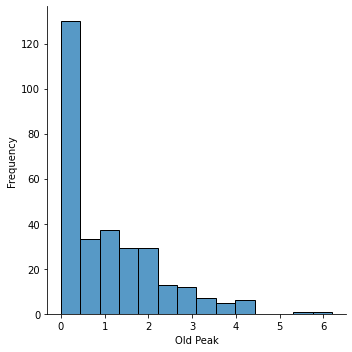

In [29]:
sns.displot(data=df, x="oldpeak");

plt.xlabel("Old Peak")
plt.ylabel("Frequency")
plt.show()

### Categorical Variables

<AxesSubplot:xlabel='sex', ylabel='count'>

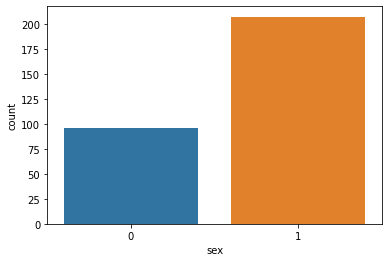

In [34]:
sns.countplot(data=df, x="sex")

Male users are more than female users.

[Text(0, 0, 'typical angina'),
 Text(1, 0, 'atypical angina'),
 Text(2, 0, 'non-anginal pain'),
 Text(3, 0, 'asymptomatic')]

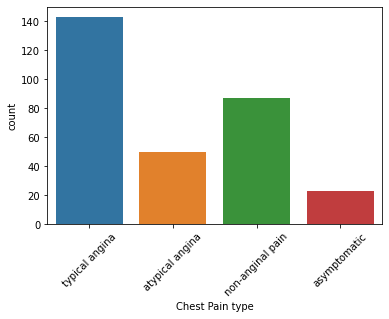

In [43]:
chart = sns.countplot(data=df, x="cp")
plt.xlabel("Chest Pain type")

chart.set_xticklabels(['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'],rotation=45)

[Text(0, 0, 'False'), Text(1, 0, 'True')]

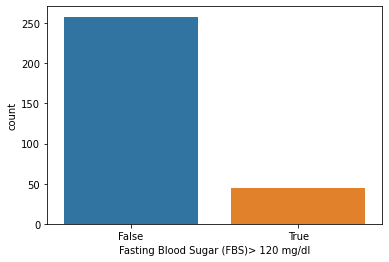

In [47]:
chart = sns.countplot(data=df, x="fbs")
plt.xlabel("Fasting Blood Sugar (FBS)> 120 mg/dl")

chart.set_xticklabels(['False', 'True'])

The Sugar level of the majority of patients is under 120 mg/dl.

[Text(0, 0, 'normal'),
 Text(1, 0, 'ST-T wave abnormality'),
 Text(2, 0, 'Left ventricular hypertrophy')]

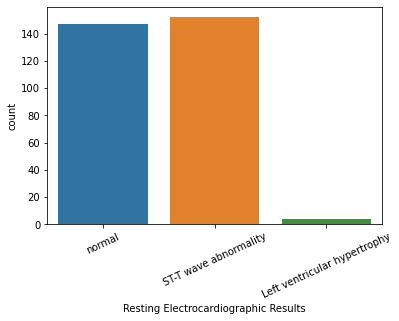

In [65]:
chart = sns.countplot(data=df, x="restecg")
plt.xlabel("Resting Electrocardiographic Results")

chart.set_xticklabels(['normal', 'ST-T wave abnormality', 'Left ventricular hypertrophy'],rotation=25)

Most of the patients have ST-T wave abnormality.

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

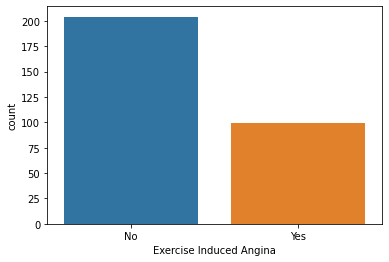

In [50]:
chart = sns.countplot(data=df, x="exng")
plt.xlabel("Exercise Induced Angina")

chart.set_xticklabels(['No', 'Yes'])

Most of the patients don't have Exercise Induced Angina.

Text(0.5, 0, 'Slope')

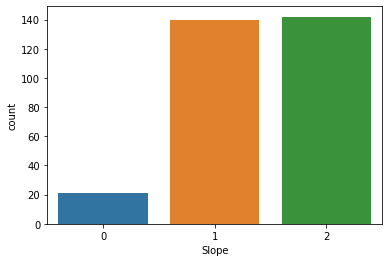

In [59]:
chart = sns.countplot(data=df, x="slp")
plt.xlabel("Slope")

Text(0.5, 0, 'Number of Major Vessels')

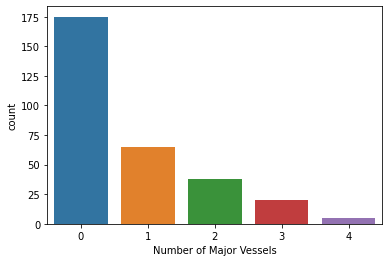

In [64]:
chart = sns.countplot(data=df, x="caa")
plt.xlabel("Number of Major Vessels")

Text(0.5, 0, 'Thallium Stress Test Result')

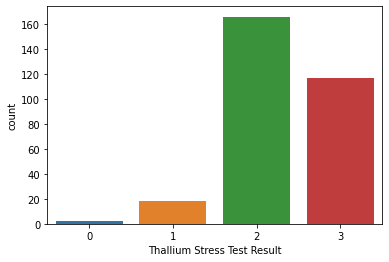

In [63]:
chart = sns.countplot(data=df, x="thall")
plt.xlabel("Thallium Stress Test Result")

[Text(0, 0, 'Low chances of heart attack'),
 Text(1, 0, 'High chances of heart attack')]

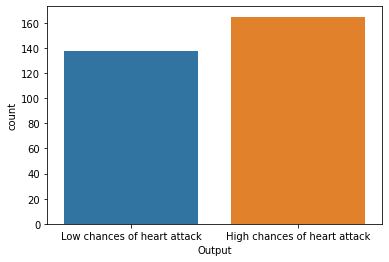

In [72]:
chart = sns.countplot(data=df, x="output")
plt.xlabel("Output")
#Low chances of heart attack 1= High chances of heart attack

chart.set_xticklabels(['Low chances of heart attack', 'High chances of heart attack'])

In [74]:
df[continous_columns].corr()

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216
chol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000


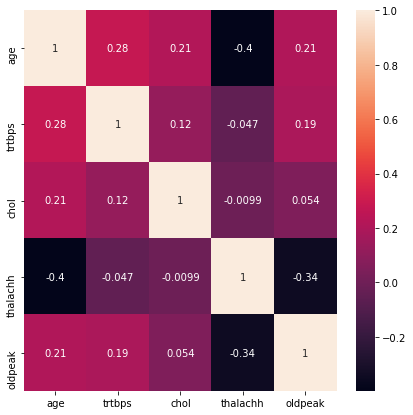

In [78]:
fig = plt.figure(figsize=(7,7))

sns.heatmap(df[continous_columns].corr(), annot=True)
plt.show()

We can see that strongest correlation is a negative correlation between Maximum Heart Rate Achieved(thalachh) and age(-0.4).This means that when you get older, your heart rate decreases.We can see that downward trend in the below chart.

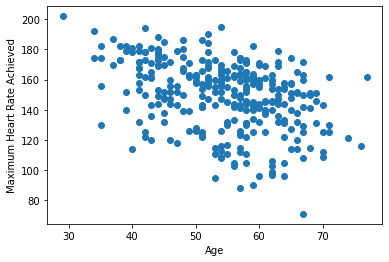

In [90]:
plt.scatter(data =df, x = 'age' , y = 'thalachh')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")

plt.show()

Correlation between age and trtbps(resting blood pressure (in mm Hg)) is the highest positive correlation in this dataset with 0.28.There is also a 0.21 correlation between age and cholestoral(in mg/dl).Both of these correlation values are low and shows weak relations.

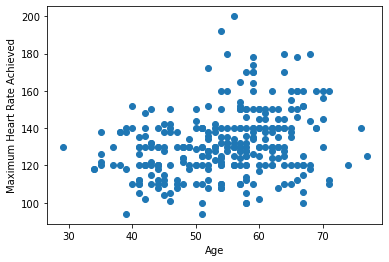

In [91]:
plt.scatter(data =df, x = 'age' , y = 'trtbps')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")

plt.show()

#### Splitting Data

Before applying the machine learning methods, we have to split our data into training set and test set. I have to use normalization in order to give equal weights/importance to each feature so that no single feature steers model performance in one direction just because it has larger value.By using MinMaxScaler I change the values of numeric feature of the dataset to a common scale.

In [371]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_curve

In [372]:
df_copy = df.copy()

df_copy = pd.get_dummies(df_copy, columns= categorical_columns, drop_first =True)

#Y is the target column, X has the features
X = df_copy.drop('output', axis =1)
y = df_copy['output']

#Split the data into training set and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 12)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#use MinMaxScaler to put all features values in the same range and scale
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Model Building

In this step, we have choose some classification methods from scikit-learn library to predict class of test set samples.I used Support Vector Machine, LogisticRegression, DecisionTreeClassifiers and KNeighborsClassifier.

#### Logistic Regression

In [373]:
logReg_model = LogisticRegression()

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 86.0%

              precision    recall  f1-score   support

           0       0.83      0.96      0.89        45
           1       0.95      0.80      0.87        46

    accuracy                           0.88        91
   macro avg       0.89      0.88      0.88        91
weighted avg       0.89      0.88      0.88        91



The accuracy of this model on training data is The accuracy of this model on training data is 86.0% and accuracy of model on test data is 88%.

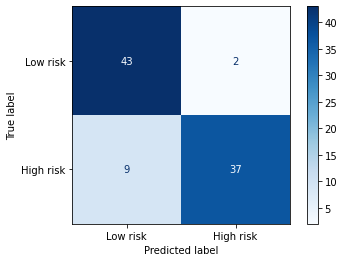

In [375]:
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

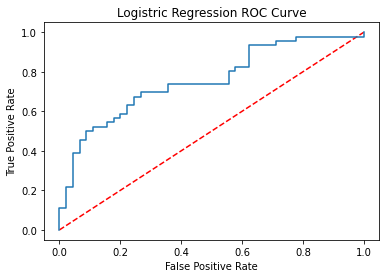

In [376]:
y_pred_proba = logReg_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot([0,1],[0,1],"r--")
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistric Regression ROC Curve")
plt.show()

A ROC curve is constructed by plotting the true positive rate (TPR) against the false positive rate (FPR).
The more that the curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.

As we can see from the plot above, this logistic regression model does a pretty good job of classifying the data into categories.

#### K Nearest Neighbor

For finding the best k for our model, I run the KNN algorithm for 90 times and find the k that gives the best accuracy score.This k is 35 for our data.

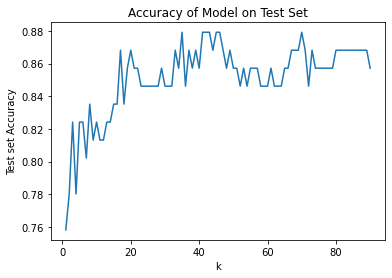

Best K for best accuracy is: 35


In [377]:
accuracies = []
k_list = list(range(1,91))

for k in range(1,91):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    accuracies.append(KNNmodel.score(X_test_scaled, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")

In [378]:
KNNmodel = KNeighborsClassifier(n_neighbors = 35)

KNNmodel.fit(X_train_scaled, y_train)

training_accuracy = KNNmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = KNNmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 82.0%

              precision    recall  f1-score   support

           0       0.87      0.89      0.88        45
           1       0.89      0.87      0.88        46

    accuracy                           0.88        91
   macro avg       0.88      0.88      0.88        91
weighted avg       0.88      0.88      0.88        91



The accuracy of KNN model(K=35) on training data is 82% and accuracy of model on test data is 88%.

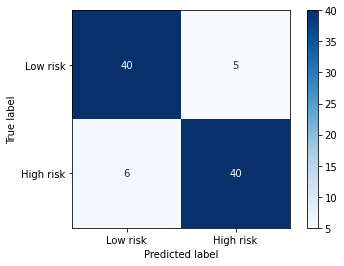

In [379]:
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

#### Decision Tree Classifier

When using a Decision Tree classifier in python we can tune its hyperparameters to get the best result.We can find the best parameters that give best score.By using grid search technique, we can achieve this.I used 'criterion', 'max_depth', 'min_samples_leaf' for tuning.

In [380]:
param_grid = {"max_depth": [7, 8, 10, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)

tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}
Best score is 0.7726467331118494


In [382]:
DTmodel = DecisionTreeClassifier(criterion =  'entropy' , max_depth =  10, min_samples_leaf = 2)

DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

print(DTmodel.get_depth())

The accuracy of model on training data is: 95.0%

              precision    recall  f1-score   support

           0       0.70      0.87      0.77        45
           1       0.83      0.63      0.72        46

    accuracy                           0.75        91
   macro avg       0.76      0.75      0.74        91
weighted avg       0.76      0.75      0.74        91

10


The accuracy of Decision Tree on training data is 95.0% and accuracy of model on test data is 75%.

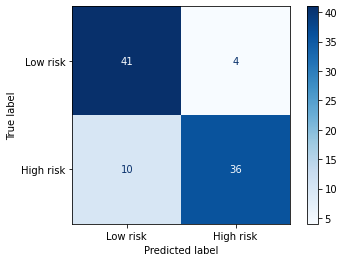

In [385]:
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

#### Support Vector Machine

In [387]:
clf = SVC(kernel = 'rbf', C = 2, gamma = 1)

clf.fit(X_train_scaled, y_train)

training_accuracy = clf.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = clf.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 97.0%

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        45
           1       0.90      0.78      0.84        46

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [388]:
param_grid = {'C': list(range(1,10)),
              'kernel': ['rbf', 'linear'],
              'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 5]}

SVCmodel = SVC()

svm_cv = GridSearchCV(SVCmodel, param_grid, cv = 5)

svm_cv.fit(X_train_scaled, y_train)

y_pred = svm_cv.predict(X_test_scaled)

# Print the tuned parameters and score
print("Tuned Support Vector Machine classifier Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))
training_accuracy = svm_cv.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()
print("The test accuracy score of SVM after hyper-parameter tuning is ", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))


Tuned Support Vector Machine classifier Parameters: {'C': 9, 'gamma': 0.01, 'kernel': 'rbf'}
Best score is 0.8200442967884829
The accuracy of model on training data is: 84.0%

The test accuracy score of SVM after hyper-parameter tuning is  0.8241758241758241
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        45
           1       0.89      0.74      0.81        46

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91



The accuracy of SVM on training data is 84.0% and accuracy of model on test data is 82%.

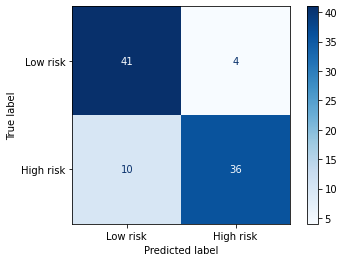

In [389]:
matrix = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = ['Low risk', 'High risk'])
cm_display.plot(cmap=plt.cm.Blues)

plt.show()

We can see that KNN model and LogisticRegression model has the best results on test data by 88% accuracy.

## Conclusion

- Most of the patients are between 47 to 65 years old.
- There are more male patients than female patients.
- Most of the patients have a blood pressure around 130 mm Hg.
- Maximum Heart Rate Achieved by most of the patients is around 160.
- The Sugar level of the majority of patients is under 120 mg/dl.
- Most of the patients have ST-T wave abnormality.
- There is a negative correlation between Maximum Heart Rate Achieved(thalachh) and age(-0.4).This means that when you get older, your heart rate decreases.
- KNN model and LogisticRegression model outperform other models with 88% accuracy.